# Hackathon prep

source: https://collegescorecard.ed.gov/data

In [2]:
import pandas as pd

In [4]:
# LOAD DATA
field_map = pd.read_csv('./data/field_map.csv')
field_study_all_years_carthage = pd.read_csv('./data/field_study_all_years_carthage.csv')
institution_all_years_carthage = pd.read_csv('./data/institution_all_years_carthage.csv')

In [5]:
institution_all_years_carthage['FILE_YEAR'] = institution_all_years_carthage['file_name'].str.extract(r'(\d{4})')[0].astype(int)

In [6]:
non_null_columns = institution_all_years_carthage.columns[institution_all_years_carthage.notna().all()].tolist()
non_null_columns_2015_on = institution_all_years_carthage.columns[institution_all_years_carthage[institution_all_years_carthage.FILE_YEAR>=2015].notna().all()].tolist()

fully_populated_fields = field_map[field_map.source.isin(non_null_columns)]
fully_populated_fields_2015_on = field_map[field_map.source.isin(non_null_columns_2015_on)]


In [8]:
fully_populated_fields.head()

,source,type,description,index,map,calculate
0,UNITID,integer,Unit ID for institution,NaN,NaN,NaN
1,OPEID,NaN,8-digit OPE ID for institution,varchar(10),NaN,NaN
2,OPEID6,NaN,6-digit OPE ID for institution,varchar(10),NaN,NaN
3,INSTNM,autocomplete,Institution name,fulltext,NaN,NaN
4,CITY,autocomplete,City,varchar(200),NaN,NaN


In [9]:
fully_populated_fields_2015_on.head()

,source,type,description,index,map,calculate
0,UNITID,integer,Unit ID for institution,NaN,NaN,NaN
1,OPEID,NaN,8-digit OPE ID for institution,varchar(10),NaN,NaN
2,OPEID6,NaN,6-digit OPE ID for institution,varchar(10),NaN,NaN
3,INSTNM,autocomplete,Institution name,fulltext,NaN,NaN
4,CITY,autocomplete,City,varchar(200),NaN,NaN


<Axes: title={'center': 'Percentage of degrees awarded in Health Professions And Related Programs.'}, xlabel='FILE_YEAR'>

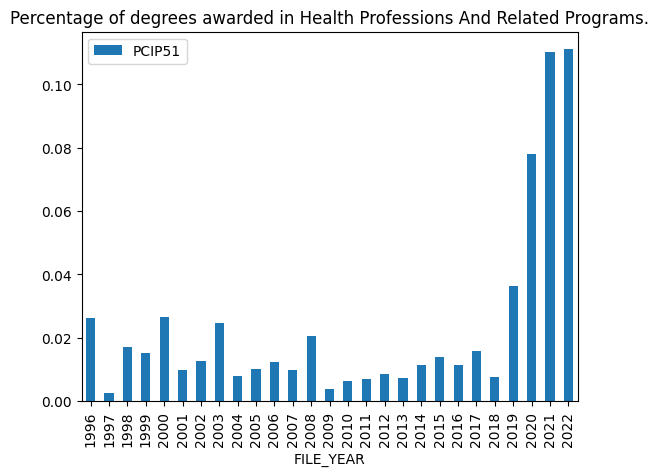

In [64]:
institution_all_years_carthage.plot(x='FILE_YEAR', y='PCIP51', kind='bar', title=field_map[field_map.source=='PCIP51'].description.values[0])

<Axes: title={'center': 'Percentage of degrees awarded in Physical Sciences.'}, xlabel='FILE_YEAR'>

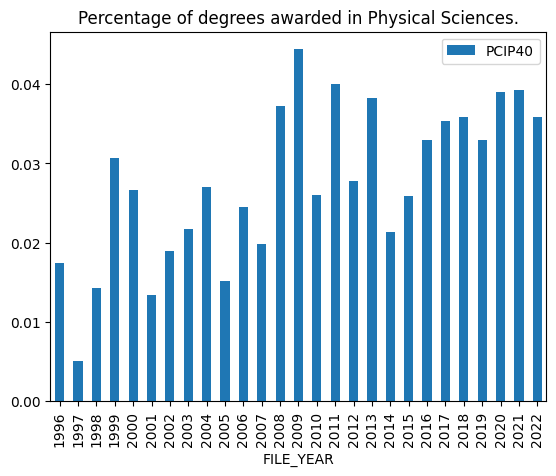

In [65]:
institution_all_years_carthage.plot(x='FILE_YEAR', y='PCIP40', kind='bar', title=field_map[field_map.source=='PCIP40'].description.values[0])

<Axes: title={'center': 'Percentage of Degrees Awarded \n Physical Sciences (BLUE) vs Health Professions (ORANGE)'}, xlabel='FILE_YEAR'>

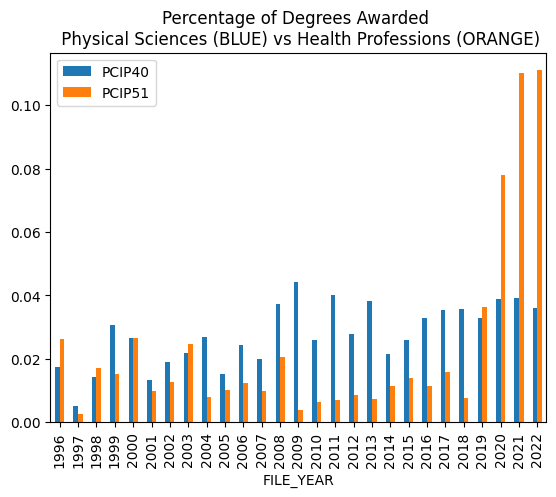

In [69]:
institution_all_years_carthage.plot(x='FILE_YEAR', y=['PCIP40', 'PCIP51'], kind='bar', title="Percentage of Degrees Awarded \n Physical Sciences (BLUE) vs Health Professions (ORANGE)")